In [1]:
import xarray as xr

# To deal with NASA earthdata login
import netrc 
import fsspec
import aiohttp

In [3]:
# Authentication requiring local .netrc
# Or else:  ReferenceNotReachable: Reference "lat/0" failed to fetch target ['https://data.gesdisc.earthdata.nasa.gov/data/MERRA2/M2SDNXSLV.5.12.4/2024/01/MERRA2_400.statD_2d_slv_Nx.20240101.nc4', 25317, 76]
(username, account, password) = netrc.netrc().authenticators("urs.earthdata.nasa.gov")
fsspec.config.conf['https'] = dict(client_kwargs={'auth': aiohttp.BasicAuth(username, password)})

vref = 'https://raw.githubusercontent.com/scottyhq/virtualizarr-merra2/main/test-remote.json'
ds = xr.open_dataset(vref, engine='kerchunk', chunks={})

In [4]:
ds

<xarray.Dataset> Size: 839kB
Dimensions:   (time: 1, lat: 361, lon: 576)
Coordinates:
  * lat       (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon       (lon) float64 5kB -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * time      (time) datetime64[ns] 8B 2024-01-01T12:00:00
Data variables:
    TPRECMAX  (time, lat, lon) float32 832kB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
Attributes: (12/31)
    Comment:                           GMAO filename: d5124_m2_jan10.statD_2d...
    Contact:                           http://gmao.gsfc.nasa.gov
    Conventions:                       CF-1
    DataResolution:                    0.5 x 0.625
    EasternmostLongitude:              179.375
    Filename:                          MERRA2_400.statD_2d_slv_Nx.20240101.nc4
    ...                                ...
    TemporalRange:                     1980-01-01 -> 2016-12-31
    Title:                             MERRA2 statD_2d_slv_Nx: 2d,Daily,Aggre...
    VersionID:                         5.12.4
    WesternmostLongitude:              -180.0
    identifier_product_doi:            10.5067/9SC1VNTWGWV3
    identifier_product_doi_authority:  http://dx.doi.org/

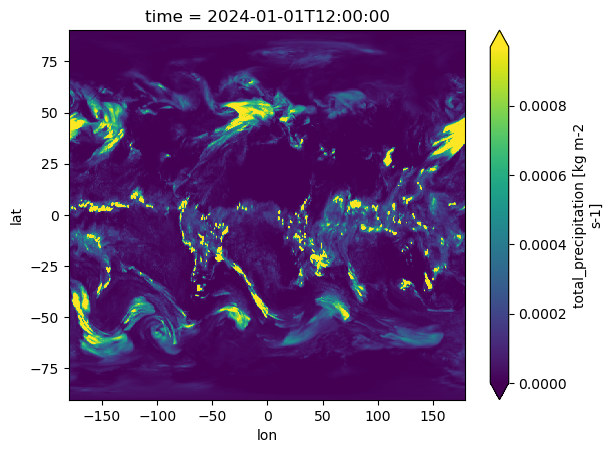

In [6]:
ds.TPRECMAX.isel(time=0).plot(robust=True)